## Исследование данных о российском кинопрокате



**Цель исследования** — изучить рынок российского кинопроката и выявить текущие тренды. 

**Задачи:**

- Изучить фильмы, которые получили государственную поддержку. 
- Дать ответ на вопрос, насколько такие фильмы интересны зрителю.

**План исследования**
1. Изучить данные 
2. Предобработка данных 
3. Исследовательский анализ данных
4. Исследовать фильмы, которые получили гостударсвтенную поддержку
5. Сделать общий вывод исследования

**Согласно документации к данным.**

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений:
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах:
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## Этап 1. Полученние данных

Изучим предоставленные данные.

### Импорт библиотек

In [1]:
import pandas as pd # импорт билбиотеки пандас
import matplotlib.pyplot as plt # импорт библиотеки матплотлиб для построения графиков

Прочитаем файл `mkrf_movies.csv` и сохраним его в переменной `movies`.

In [2]:
movies = pd.read_csv(r"C:\Users\stepa\Downloads\mkrf_movies.csv") # чтение файла с данными и сохранение в movies

Прочитаем файл `mkrf_shows.csv` и сохраним его в переменной `shows`.

In [3]:
shows = pd.read_csv(r"C:\Users\stepa\Downloads\mkrf_shows.csv") # чтение файла с данными и сохранение в shows

Выведем первые 5 строк таблиц `movies` и `shows`, чтобы проверить несклеились-ли данные в одну строку.

In [4]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Общая информация о данных таблиц `movies` и `shows`.

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Рассмотрим полученную информацию подробнее.

Всего в таблице 15 столбцов, тип данных - `float`(3), `object`(12). 
Название столбцов соотвествует стилю, кроме столбца `puNumber`.

Количестов значений в столбцах разное, а значит в них есть пропущенные значения.

In [7]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 2 столбца, тип данных - `float`(1), `int`(1). 
Название столбцов соотвествует стилю, кроме столбца `puNumber`.

Количестов значений в столбцах одинаковое, а значит пропущенных значений нет.

Эти два датафрейма необходимо объединить в один для удобства. Как видно у обоих есть один и тот же столбец по которму и будем объединять `puNumber`, но для начала необходимо привести его к одному типу данных.

**Изменение типов данных**

Преобразуем в таблицах столбец `puNumber` в тип данных в `string`.

In [8]:
shows['puNumber'] = shows['puNumber'].astype('string') # преобразуем тип данных в таблице shows

In [9]:
movies['puNumber'] = movies['puNumber'].astype('string') # преобразуем тип данных в таблице movies

Проверим поменялся-ли тип данных

In [10]:
shows.dtypes

puNumber       string
box_office    float64
dtype: object

In [11]:
movies.dtypes

title                     object
puNumber                  string
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

**Обьединение в один датафрейм**

In [12]:
movies_shows = movies.merge(shows, on='puNumber', how='outer')

Выведем информацию об общем датафрейме

In [13]:
movies_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   string 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Рассмотрим полученную информацию подробнее.

Всего в таблице 16 столбцов, тип данных - `float`(4), `object`(11) и `string`(1). 
Название столбцов соотвествует стилю, кроме столбца `puNumber`.

Видно, что добавился один столбец из датафрейма `shows`. Количество значений в нем `3158`, а значения других столбцов не поменялись, а значит все добавилось верно.

Количестов значений в столбцах разное, а значит в них есть пропущенные значения.

**Вывод**

Каждая строка таблицы содержит информацию о фильме, который выходил в прокат в России. Есть несколько проблем такие, как:
1. Некачественное название столбца `puNumber`
2. Есть пропуски в данных, необходимо по возможности их заполнить
3. Исправить тип данных в столбцах `show_start_date` и `ratings`
4. Следует сделать проверку на явные дубликаты
5. Стоит проверить столбец `title` на наличие неявных дубликатов, название одного и того же фильма могли написать по разному, например вместо ё написать е.
6. Необходимо проверить столбцы с категориальными значениями на аномалии: `type`, `age_restriction` и `ratings`
7. Необходимо проверить столбцы с количествеными значениями на аномалии: `box_office`, `nonrefundable_support`, `refundable_support` и `budget`
8. Добавим несколько столбцов для более глубого анализа:
    - `year_show_start` - год премьеры фильма
    - `main_genre` - основной жанр фильма
    - `main_director` - основной режиссер
    - `share_total_budget` - доля государственного финансирования от общего бюджета

## Этап 2. Предобработка данных

Переименуем столбец `puNumber` для того, чтобы он соотвествовал стилю.

In [14]:
movies_shows = movies_shows.rename(columns={'puNumber': 'pu_number'}) # переименование столбца

In [15]:
movies_shows.columns # проверка результатов

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

### Шаг 2.1. Проверим тип данных

Изменим тип данных в столбце `show_start_date` с `object` на `datetime`.

In [16]:
# меняем тип данных на datetime
movies_shows['show_start_date'] = pd.to_datetime(movies_shows['show_start_date'], format='%Y-%m-%d %H:%M:%S')

Также необхожимо поменять тип данных в столбце `ratings` на `float`. Для начала выведем уникальные значения из этого столбца для того, чтобы убедиться, что мы можем менять тип данных.

In [17]:
movies_shows['ratings'].unique() # выводим уникальные значения

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как видно есть значения в которых присутсвует `%`. Поэтому необходимо от него избавиться.

In [18]:
movies_shows['ratings'] = movies_shows['ratings'].replace('%', value='', regex=True) # заменяем % на ''

Теперь можем изменить тип данных на `float`

In [19]:
movies_shows['ratings'] = movies_shows['ratings'].astype('float') # меняем тип данных

Так как большинсвто оценок записаны по 10-ти бальной системе, то теперь нам необходимо заменить те значения в которых был поменян `%` привести к 10-ти бальной, то есть разделим эти числа на `10`.

In [20]:
movies_shows['ratings'] = (
    movies_shows['ratings']
    .where(movies_shows['ratings'] < 10, movies_shows['ratings'] / 10)
)

В столбцах `nonrefundable_support`, `refundable_support` и `budget` имеет смысл поменять тип данных на `int`, так как цифры там большие и значения после запятой, то есть в данном случае они являются копейками, и ими можно пренебречь.

В остальных столбцах изменять тип данных не имеет смысла.

Проверим изменились ли типы данных. Должно стать на два меньше `object` и добавиться по одному `float` и `datetime`. То есть должно стать так: `float`(5), `object`(9), `string`(1) и `datetime`(1)

In [21]:
movies_shows.dtypes

title                                 object
pu_number                             string
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

### Шаг 2.2. Изучим пропуски в датафрейме

Выведем количество пропущенных значений для каждого столбца

In [22]:
movies_shows.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

Пропуски есть во всех столбца, кроме столбцов `pu_number`, `title`, `show_start_date`, `type` и `age_restriction`.

От пропусков в трех столбцах:
- `production_country`
- `director`
- `film_studio`

можно избавиться удалив строки с ними, так как общее количество этих пропусков составляет 29 и их удаление не повлияет на исследование.

Столбцы:
- `genres`
- `financing_source`
- `producer`

имеет смысл заполнить строкой `unknown`, так как, возможно, могут пригодиться для дальнейшего исследования.

Остальные столбцы оставляем, заполнить не получиться, они связаны с рейтингом, общим сбором и финансирование государством их измениение может повлиять на исходное исследование.

**Вывод**

Пропуски в данных могли произойти по различным причинам:
1. Киностудии и кинотеатры могут не раскрывать данные о прокате, если ожидания не оправдались
2. В столбце `budget` хранятся данные только о фильмах с государсвтенной поддержкой
3. Информация в принципе о фильме может отсутсвовать 
4. Возможно есть очень нишевые фильмы и их показывали в небольшом количестве кинотеатров и на них попросту могли не прийти
5. Некоректно перенслась информация
6. Возможно может присутсвувать проблема с записью

В столбцах `production_country`, `director` и `film_studio` количество пропущенные значений 2, 9 и 18 соотвественно, так как пропусков получается немного, то их можно удалить и они не повлияют на исследование.

In [23]:
movies_shows = movies_shows.dropna(subset=['production_country', 'director', 'film_studio']).reset_index(drop=True)

Так как значения в столбцах `genres`, `financing_source` и `producer` восстановить не получиться. Придется пропущенные значения заменять на строку 'unknown'.

In [24]:
columns_to_replace = ['genres', 'financing_source', 'producer'] # перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
for column in columns_to_replace:
    movies_shows[column] = movies_shows[column].fillna('unknown')

Проверим результат нашей работы. Пропусков должно стать меньше, а именно они должны пропасть в следующих столбцах:
- `production_country`
- `director`
- `film_studio`
- `genres`
- `financing_source`
- `producer`

In [25]:
movies_shows.isna().sum().sort_values(ascending=False)

refundable_support       7127
nonrefundable_support    7127
budget                   7127
box_office               4304
ratings                   948
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
financing_source            0
genres                      0
dtype: int64

### Шаг 2.3. Изучим дубликаты в датафрейме

Сделаем проверку на явные дубликаты.

In [26]:
movies_shows.duplicated().sum() # проверяем количество явных дубликатов

0

С неявными дубликатами сложнее, предположем, что в каких-то названиях фильма используется `ё` или `е`.

In [27]:
movies_shows['title'].value_counts() # считаем количество уникальных значений

День святого Валентина_                                        5
Там, где живут чудовища                                        4
Жена путешественника во времени                                4
Рапунцель: Запутанная история                                  4
Код доступа "Кейптаун"                                         4
                                                              ..
Больше, чем любовь "Любимая женщина режиссера Тодоровского"    1
Бойся своих желаний                                            1
Доказательство жизни                                           1
Моя девочка не хочет...                                        1
Аисты                                                          1
Name: title, Length: 6746, dtype: int64

Сделаем замену `ё` на `е` и еще раз посчитаем уникальные значения

In [28]:
movies_shows['title'] = movies_shows['title'].str.replace('ё', 'е')

In [29]:
movies_shows['title'].value_counts()

День святого Валентина_                  5
Кошки против собак: Месть Китти Галор    4
Дитя тьмы                                4
Начало_                                  4
Прощание                                 4
                                        ..
Фиш и Чип. Вредные друзья                1
Колетт                                   1
Ева                                      1
Шопо-коп                                 1
Аисты                                    1
Name: title, Length: 6744, dtype: int64

Как видно строк стало меньше 2, значит неявные дубликаты были устранены.

Теперь проверим дулибкаты в номерах прокатных удостоверений, то есть в столбце `pu_number`.

In [30]:
movies_shows['pu_number'].value_counts()

221154310    2
221054410    2
114000312    1
111018819    1
121002314    1
            ..
111011810    1
221031515    1
124004716    1
121034619    1
111006611    1
Name: pu_number, Length: 7457, dtype: Int64

Видно, что есть два номера, которые соотвествуют нескольким фильмам это `221054410` и `221154310`, посмсотрим на них более подробно.

In [31]:
movies_shows[movies_shows['pu_number'] == '221054410'] # находим фильмы с одинаковым прокатным удостоверением

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5056,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.4,"комедия,криминал",NaN
5057,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.8,"комедия,криминал",NaN


In [32]:
movies_shows[movies_shows['pu_number'] == '221154310'] # находим фильмы с одинаковым прокатным удостоверением

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.0,"мелодрама,комедия",NaN
4630,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.6,"драма,мелодрама,история",NaN


Так как таких дублей всего 2, то удалим их.

In [33]:
movies_shows = movies_shows.drop_duplicates(subset='pu_number').reset_index(drop=True)

Видно, что по номеру `221054410` оба фильма связаны `Анализируй это!` и `Анализируй то!`, один из них сиквел другого. Оба фильмы имеют одинаковую дату премьеры, что дает предположить, что запрос был одновремено на оба фильма и от одной компании. 

По номеру `221154310` фильмы уже никак не связаны между собой, но у них также одна и таже дата премьеры.

В обоих случаях ошика на стороне Минестерсва культуры, они скорее всего сделали ошибку при заполнения файла, возможно они должны были отличаться всего одной цифрой, либо же какая-то техническая ошибка, также, если зайти на сайт Минестерства культуры и найти эти фильмы, то там такие же номера прокатного удостоверения, что говорит об ошибке с их стороны.

Данную ситуацию исправили удалением этих дублей, потому что их всего 2.

**Вывод**

Явные дубликаты могли бы быть из-за разных технических ошибок, например, случайное дублирование данных из-за сбоя.

Неявные дубликаты появились из-за разного написания одного и того же фильма. Также в датафрейме есть записи с одинаковыми названиями фильмов, в данном случае это не является дубликатом, так как скорее всего эти фильмы получили несколько прокатных удостоверений в разное время.

### Шаг 2.4. Изучим категориальные значения

Так как категориальные значения - это одно значение, которое принимает переменная из ограниченного набора. Их отличие от количественных, что количественные можно сравнить между собой, а следовательно в нашем случаем категориальные значеняи встречаются в столбцах `type`, `age_restriction`, `genres`, `production_country`, `producer`, `financing_source`, `film_studio`, `director` и `title`.

Проверим столбец `type` на уникальные значения.

In [34]:
movies_shows['type'].unique() # выводим уникальные значения столбца

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видно, что у некоторых значений появился пробел в начале строки. Надо это исправить.

In [35]:
movies_shows['type'] = movies_shows['type'].str.strip()

Еще раз получим список уникальных значений.

In [36]:
movies_shows['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь проверим столбец `age_restriction` и проделаем такие же действия, если это необходимо.

In [37]:
movies_shows['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Проверим столбец `director` на уникальные значения.

In [38]:
movies_shows['director'].unique() # выводим уникальные значения столбца

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

Проверим столбец `genres` на уникальные значения.

In [39]:
movies_shows['genres'].unique() # выводим уникальные значения столбца

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

Проверим столбец `production_country` на уникальные значения.

In [40]:
movies_shows['production_country'].unique() # выводим уникальные значения столбца

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Проверим столбец `producer` на уникальные значения.

In [41]:
movies_shows['producer'].unique() # выводим уникальные значения столбца

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Проверим столбец `financing_source` на уникальные значения.

In [42]:
movies_shows['financing_source'].unique() # выводим уникальные значения столбца

array(['unknown', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Проверим столбец `film_studio` на уникальные значения.

In [43]:
movies_shows['film_studio'].unique() # выводим уникальные значения столбца

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

У некоторых значений появился пробел в конце строки. Надо это исправить.

In [44]:
movies_shows['film_studio'] = movies_shows['film_studio'].str.strip()

Еще раз получим список уникальных значений.

In [45]:
movies_shows['film_studio'].unique() # выводим уникальные значения столбца

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

Проверим столбец `title` на уникальные значения.

In [46]:
movies_shows['title'].unique() # выводим уникальные значения столбца

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

**Вывод**

Во всех категориальных данных есть общая проблема, многие значения написаны через разделитель, то есть, например, имеют несколько студий производтсва. Если в столбцах `director`, `genres`, `film_studio` еще можно понять, что скорее всего на первых местах стоят основные режисеры, жанры и студии, то в столбцах `financing_source`, `producer` и `production_country`, хоть так и тоже может быть, но уже с увереностью сказать нельзя.
        
Также в столбце `director` различаются написание имен режиссеров, то есть либо записано полностью имя, например, Кевин Костнер, либо же Е.Матвеев. Скорее всего это связано с тем, что зарубежом не принято так сокращать имена и поэтому они записаны полностью. То есть зависит от страны производтсва и студии.

Причины почему так записаны, в том, что необходимо написать всех кто участвовал в создании фильма и написать всевозможные его жанры, поэтому их записывают в один столбец друг за другом, чтобы не создавать каждый раз новую строку. Также стоит отметить, что из-за такого хранения данных могут появиться неявные дубликаты. Например записи `боевик, комедия` и `комедия, боевик`.

### Шаг 2.5. Проверим количественные значения

Количественные значения находятся в столбцах `box_office`, `budget`, `refundable_support`, `nonrefundable_support` и `ratings` все они связаны с финансами.

Значения в столбце `box_office` записаны не очень удобно, поэтому исправим это

In [47]:
pd.options.display.float_format ='{:.1f}'.format

Построим гистограмму по столбцу `box_office`

Text(0.5, 1.0, 'Сборы фильмов')

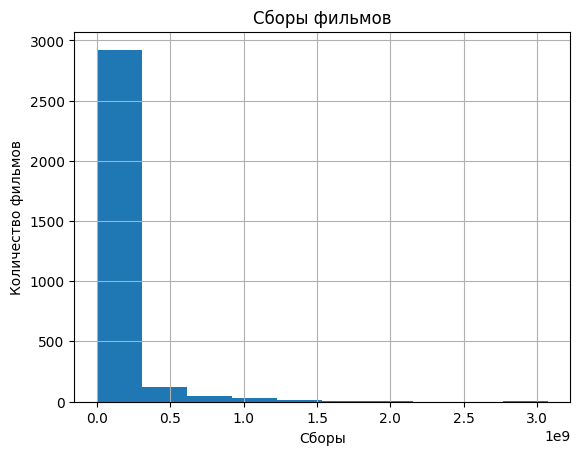

In [48]:
movies_shows['box_office'].hist()
plt.xlabel("Сборы")
plt.ylabel("Количество фильмов")
plt.title("Сборы фильмов")

Много значений возле нуля, это связано с пропусками, пока удалять их неимеет смысла эти фильмы пригодятся для дальнейшего исследования, но чтобы выяснить есть-ли другие аномалии в данном столбце выделим фильмы у которых сборы больше нуля.

In [49]:
movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['box_office'] < 10000)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,8.1,драма,1165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,ШПИОН,111009411,2011-12-09 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.1,"боевик,комедия,криминал",5405.0
5375,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,4.7,комедия,465.0
5376,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,7.4,"мультфильм,фэнтези,боевик",9270.0
6556,Время собирать цветы,112025118,2019-01-01 12:00:00+00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,NaN,unknown,7175.0


Видно, что есть сборы меньше 10000. Как-то исправить это непредставляется возможным. Возможно данные записаны в долларах или еще в какой-то валюте, либо же данные записаны в тысячах или в миллионах. Возможно произошла техническая неполадка и тп.

Столбец `budget` также включает в себя столбцы `refundable_support` и `nonrefundable_support`. Построим гистограмму для ее анализа.

Text(0.5, 1.0, 'Финансы')

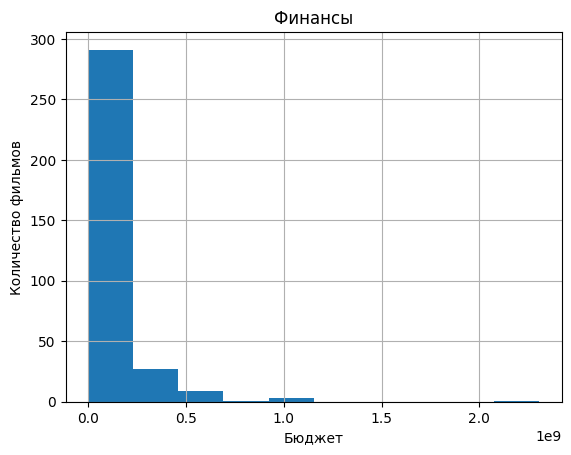

In [50]:
movies_shows['budget'].hist() # строим гистограмму по бюджету
plt.xlabel("Бюджет")
plt.ylabel("Количество фильмов")
plt.title("Финансы")

Как видно по гистограмме очень много фильмов без бюджета и это можно объяснить, так как столбец `budget` заполнялся, если было государственное финансирование, но лучше проверить вдруг есть фильмы с нулевым бюджетом.

In [51]:
movies_shows[movies_shows['budget'] == 0] # выделяем фильмы с нулевым бюджетом

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2050,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2055,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2469,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2529,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2612,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4
2681,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1957738.5
2785,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",72937783.2
2871,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,15362931.4
3044,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",70299052.0
3561,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1038321489.0


Выяснили, что есть фильмы у которых нулевой бюджет, но так как данный столбец включает в себя два столбца связанных с госудраственным финансированием, то заполним данные пробелы суммой двух столбцов `refundable_support` и `nonrefundable_support`. Да, бюджет скорее всего состоит нетолько из финансирования государства, но как минимум они включаются в бюджет.

In [52]:
movies_shows['budget'] = (
    movies_shows['budget']
    .where(movies_shows['budget'] != 0, movies_shows['refundable_support'] + movies_shows['nonrefundable_support'])
)

Теперь выясним нету-ли аномалий, то есть если сумма двух столбцов связанных с финансированием будет превышать бюджет, то следовательно есть аномалии. Для этого сначала выделим и добавим в отдельный датафрейм фильмы у которых было государственное финансирование, то есть `budget` > 0.

In [53]:
movies_support = movies_shows[movies_shows['budget'] > 0] # выбираем фильмы с государственным финансированием

Теперь в новый датафрейм добавим столбец с суммой государственного финансирования.

In [54]:
pd.options.mode.chained_assignment = None

In [55]:
movies_support['sum_fundable'] = movies_support['refundable_support'] + movies_support['nonrefundable_support']

Добавим столбец, в котором будет храниться разность между бюджетом фильма и суммой государственного финансирования.

In [56]:
movies_support['differences'] = movies_support['budget'] - movies_support['sum_fundable']

Выделим значения у которых разницы получилась отрицательная для того, чтобы найти аномалии, если они есть.

In [57]:
movies_support[movies_support['differences'] < 0].count()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
sum_fundable             0
differences              0
dtype: int64

Видно, что строки, в которых государственное финансирование превышает бюджет отсутсвует.

### Шаг 2.6. Добавим новые столбцы

Добавим столбец `year_show_start`, в котором будет храниться год премьеры фильма.

In [58]:
movies_shows['year_show_start'] = movies_shows['show_start_date'].dt.year # находим год методом dt.year

Добавим два столбца `main_genre` и `main_director` в этих столбцах будет хранится основной жанр фильма и основной режиссер. Для этого создадим функцию и применим ее к столбцам `genres` и `director` нашего датафрейма.

In [59]:
def first_value(columns):
    for i in columns:
        return columns.split(',')[0]

In [60]:
movies_shows['main_genre'] = movies_shows['genres'].apply(first_value) # применяем функцию к столбцу genres

In [61]:
movies_shows['main_director'] = movies_shows['director'].apply(first_value) # применяем функцию к столбцу director

Добавим столбец `share_total_budget`, в котором будет храниться информация о том, какую долю от общего бюджета занимается государственное финансирование в процентах.

In [62]:
movies_shows['share_total_budget'] = (
    movies_shows['budget']
    .where(movies_shows['budget'] < 0, ((movies_shows['refundable_support'] + movies_shows['nonrefundable_support']) \
                                        / movies_shows['budget']) * 100)
)

## Шаг 3. Исследовательский анализ данных

Необходимо сделать следующие шаги:
- Изучить фильмы, выходившие в прокат каждый год
- Изучить динамику проката
- Изучить среднюю и медианную сумму сборов
- Изучить влияет ли возврастное ограничение аудитории на сборы фильма

### Фильмы, выходившие в прокат каждый год

Найдем количество всех фильмов, которые выходили каждый год.

In [63]:
year_movies_count = movies_shows.groupby('year_show_start')['title'].count() # группируем по году и считаем количество фильмов

In [64]:
year_movies_count # выводим все значения

year_show_start
2010    978
2011    620
2012    592
2013    629
2014    806
2015    705
2016    817
2017    505
2018    879
2019    926
Name: title, dtype: int64

Также для удобства представим все в виде гистограммы.

Text(0.5, 1.0, 'Фильмы по каждому году')

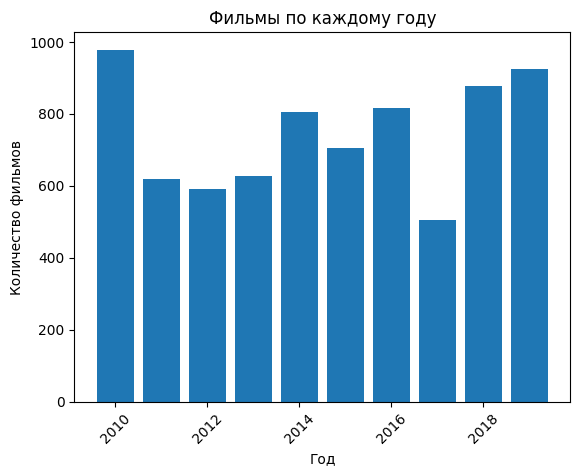

In [65]:
plt.bar(year_movies_count.index, year_movies_count)
plt.xticks(rotation=45);
plt.xlabel("Год")
plt.ylabel("Количество фильмов")
plt.title("Фильмы по каждому году")

Найдем количество фильмов, которые выходили в прокат каждый год, у которых известны сборы.

In [66]:
# выделяем фильмы со сборами и группируем их по году и считаем количество фильмов
year_box_count = movies_shows[movies_shows['box_office'] > 0].groupby('year_show_start')['title'].count()

In [67]:
year_box_count # выводим все значения

year_show_start
2010    101
2011    109
2012    122
2013    179
2014    273
2015    462
2016    524
2017    357
2018    474
2019    530
Name: title, dtype: int64

Также для удобства представим все в виде гистограммы.

Text(0.5, 1.0, 'Фильмы по каждому году')

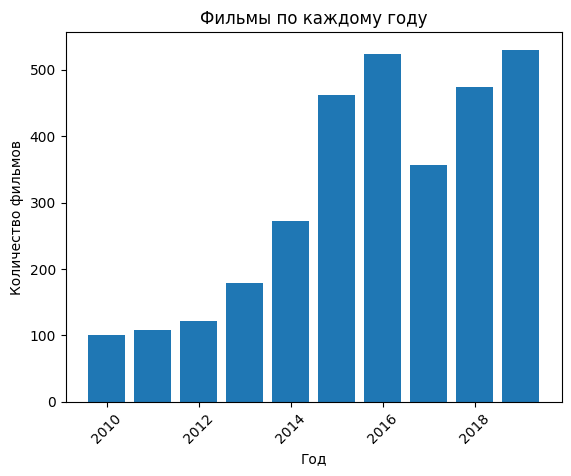

In [68]:
plt.bar(year_box_count.index, year_box_count)
plt.xticks(rotation=45);
plt.xlabel("Год")
plt.ylabel("Количество фильмов")
plt.title("Фильмы по каждому году")

**Вывод**

Видно, что фильмов, у которых известны сборы - меньше. Также видна тендция, что с каждым годом информация о сборах росла. Можно предположить, что это может быть связано с развитием технологий, а также более строгому контролю со стороны государства.

Теперь посчитаем какую долю составляют фильмы, у которых известны сборы и посмотрим ее по каждому году.

In [69]:
share_year = (year_box_count / year_movies_count) * 100 # находим долю от всех фильмов

In [70]:
share_year # выводим все значения

year_show_start
2010   10.3
2011   17.6
2012   20.6
2013   28.5
2014   33.9
2015   65.5
2016   64.1
2017   70.7
2018   53.9
2019   57.2
Name: title, dtype: float64

Также для удобства представим все в виде гистограммы.

Text(0.5, 1.0, 'Доля фильмов с информацией о прокате')

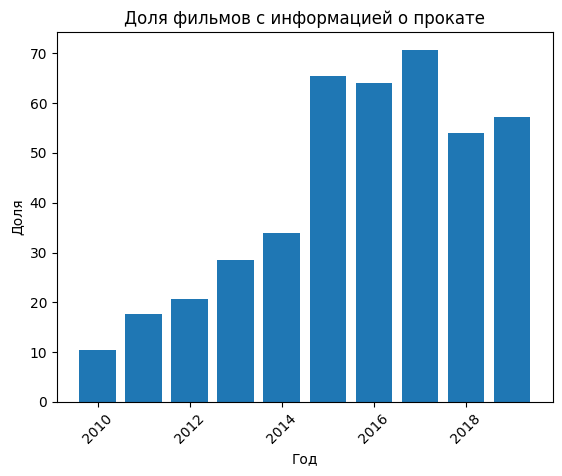

In [71]:
plt.bar(share_year.index, share_year)
plt.xticks(rotation=45);
plt.xlabel("Год")
plt.ylabel("Доля")
plt.title("Доля фильмов с информацией о прокате")

**Вывод**

Информация о сборах каждый год увеличивалась, видно, что в 2015 году произошло резкое увелечение, возможно с этого года стали чаще делиться информацией о сборах или же стало выходить больше Российский фильмов, которые также финансировались государством и из-за этого стали чаще расскрывать сборы.

Лучше всего представлен в данных 2017 год и доля фильмов с известными сборами составляет 70%. Это также может быть связано с тем, что в 2017 году вышло меньше фильмов, чем за другие года (505). Если же говорить о периоде то начиная с 2015 года и заканчивая последним годом в данных (2019) были представлены лучше всего и самым худшим значением является 54% в 2018 году.

### Динамика проката

Найдем сумму сборов по каждому из предоставленных данных году.

In [72]:
box_office_year = (
    movies_shows[movies_shows['box_office'] > 0]
    .groupby('year_show_start')['box_office'].sum()
) # выделяем фильмы со сборами и группируем их по году и считаем cумму всех сборов

In [73]:
box_office_year # выводим все значения

year_show_start
2010       2428654.0
2011      14102765.0
2012       6911073.0
2013      29799706.2
2014    7444951859.2
2015   39497365196.4
2016   47866105214.9
2017   48563707217.5
2018   49668361909.3
2019   48425708779.6
Name: box_office, dtype: float64

Найдем минимальньные и максимальные суммы сборов

In [74]:
box_office_year.min(), box_office_year.max() # выводим минимум и максимум

(2428654.0, 49668361909.31999)

Минмальное значение соответсвует 2010 году, максимальное значение соотвествует 2018 году

Также для удобства представим все в виде графика.

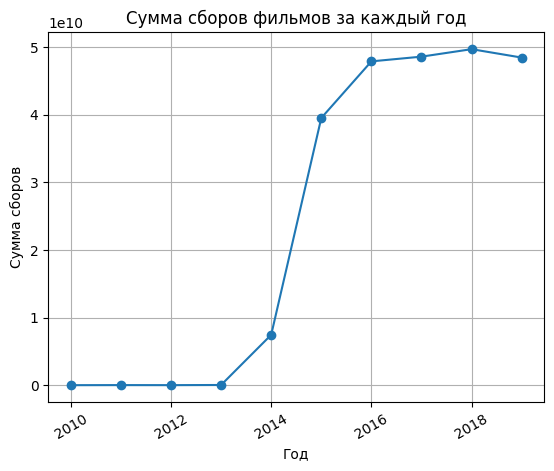

In [75]:
plt.plot(box_office_year, marker='o')
plt.grid()
plt.xticks(rotation=30)
plt.xlabel("Год")
plt.ylabel("Сумма сборов")
plt.title("Сумма сборов фильмов за каждый год")
plt.show()

**Вывод**

Как видно из результатов динамика проката с каждым годом практически увеличивалась, видно, что в 2019 году был небольшой спад, но так как данные на этом заканичиваются сделать вывод более точный не получиться.

Самым худшим годом был самый первый год в данных, то есть 2010, причин может быть несколько, например, этот год плохо представлен в данных, а также может люди в принципе в то время меньше ходили в кинотеары.

Самым лучшим годом в данных является 2018 год. На этот ответ могло повлиять то, что период с 2015 по 2019 год лучше всего представленны в данных, что как раз и видно из графика.

### Средняя и медианная сумма сборов

Найдем среднюю и медианную сумму сборов по каждому году.

In [76]:
# создаем сводную таблицу и считаем медиану и среднее
mean_med_box = movies_shows.pivot_table(index='year_show_start', values='box_office', aggfunc=['mean', 'median'])

In [77]:
mean_med_box.columns = ['mean_box', 'median_box'] # переименуем столбцы

In [78]:
mean_med_box # выводим все значения

,mean_box,median_box
year_show_start,,
2010,23130.0,1700.0
2011,129383.2,3000.0
2012,54417.9,5560.0
2013,161954.9,3522.5
2014,26684415.3,18160.0
2015,84940570.3,4920933.0
2016,91173533.7,3915041.0
2017,136032793.3,9968340.0
2018,104785573.6,8911533.9


Также для удобства представим все в виде графика.

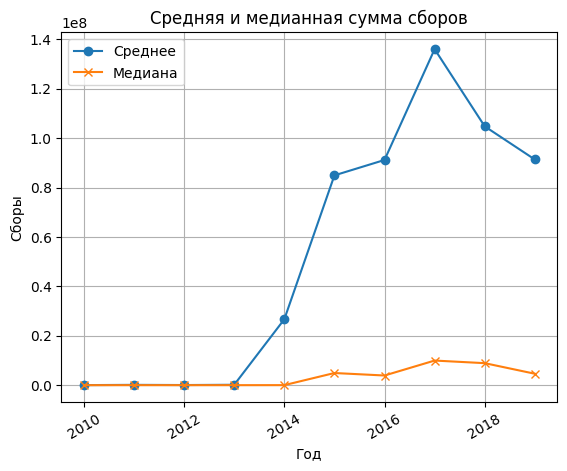

In [79]:
line_1, = plt.plot(mean_med_box['mean_box'],marker='o', label='Среднее')
line_2, = plt.plot(mean_med_box['median_box'], marker='x', label='Медиана')
plt.grid()
plt.xticks(rotation=30)
plt.xlabel("Год")
plt.ylabel("Сборы")
plt.title("Средняя и медианная сумма сборов")
plt.legend(handles=[line_1, line_2])
plt.show()

**Вывод**

Видно, что медианная сумма сборов держится примерно на одном уровне каждый год, в отличии от средней суммы. Наибольшее средние значение было получено в 2017 году и составляет оно 	136032793.3. С 2010 по 2013 год среднее значение находилось в целом на одном уровне, а с 2014 года среднее значение стало резко увеличиваться, скорее всего связано с большой разницей сборов между фильмами из-за выхода большего количества бестселлеров.

### Влияет ли возрастное ограничение аудитории на сборы фильма

Необходимо узнать зависят ли сборы от возрастного ограничения. Для этого сначла выберем фильмы со сборами и которые вышли в 2015 году или позже. Затем сделаем группировку по столбцу `age_restriction` и посчитаем для каждого значения из этого столбца сумму сборов.

In [80]:
age_box = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015)]
    .groupby('age_restriction')['box_office']
    .sum()
)

In [81]:
age_box # выводим все значения

age_restriction
«0+» - для любой зрительской аудитории     808882899.0
«12+» - для детей старше 12 лет          60619405403.3
«16+» - для детей старше 16 лет          76034733643.6
«18+» - запрещено для детей              40759615572.1
«6+» - для детей старше 6 лет            55798610799.7
Name: box_office, dtype: float64

Найдем минимальньные и максимальные суммы сборов

In [82]:
age_box.min(), age_box.max() # выводим минимум и максимум

(808882898.9700001, 76034733643.62994)

Минимальное значение соответсвует - `«0+» - для любой зрительской аудитории`

Максимальное значение соотвествует - `«16+» - для детей старше 16 лет`

Также построим гистограмму для визуализации

Text(0.5, 1.0, 'Сборы фильмов в зависимости от возраста')

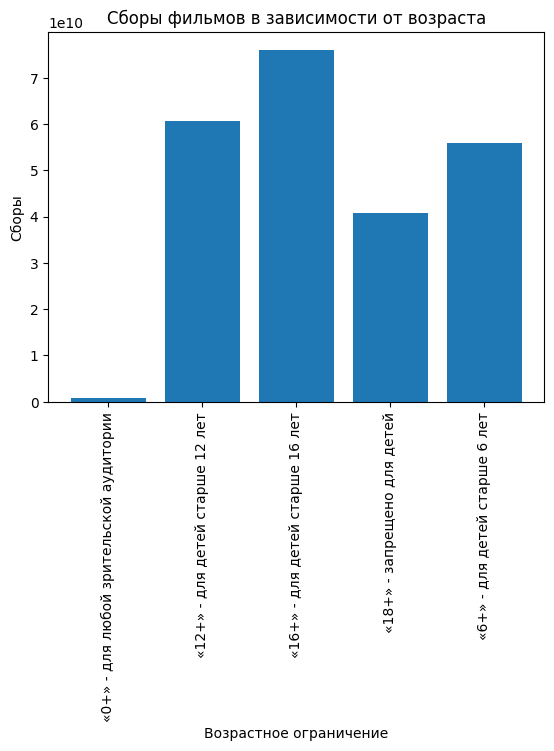

In [83]:
plt.bar(age_box.index, age_box)
plt.xticks(rotation=90);
plt.xlabel("Возрастное ограничение")
plt.ylabel("Сборы")
plt.title("Сборы фильмов в зависимости от возраста")

Теперь проверим поменяется-ли картина в зависимотси от года. Для этого также выберем фильмы со сборами и которые вышли в 2015 году или позже, а затем создадим сводную таблицу по столбцам `age_restriction` и `year_show_start` и потом также посчитаем сумму сборов.

In [84]:
age_year_box = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015)]
    .pivot_table(index=['age_restriction', 'year_show_start'], values='box_office', aggfunc='sum')
)

In [85]:
age_year_box # выводим все значения

box_office
age_restriction                        year_show_start              
«0+» - для любой зрительской аудитории 2015              379054578.4
                                       2016              150034321.7
                                       2017              229598930.0
                                       2018               32449002.1
                                       2019               17746066.8
«12+» - для детей старше 12 лет        2015            13616082008.9
                                       2016            12204446524.4
                                       2017             7851427660.7
                                       2018            14267250435.7
                                       2019            12680198773.7
«16+» - для детей старше 16 лет        2015            11368120870.3
                                       2016            16664548541.7
                                       2017            18745042900.1
                                       2018            16503602347.0
                                       2019            12753418984.6
«18+» - запрещено для детей            2015             5432308367.4
                                       2016             6793929818.9
                                       2017             9651495581.0
                                       2018             8760085501.1
                                       2019            10121796303.6
«6+» - для детей старше 6 лет          2015             8701799371.4
                                       2016            12053146008.2
                                       2017            12086142145.8
                                       2018            10104974623.4
                                       2019            12852548650.9

Также визуализируем данные по сборам в зависимости от возрастного ограничение по каждому году.

Для каждого возрастного ограничения выделим сборы фильмов по годам.

In [86]:
year_0 = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015) \
                   & (movies_shows['age_restriction'] == '«0+» - для любой зрительской аудитории')]
    .groupby('year_show_start')['box_office'].sum()
      )

In [87]:
year_6 = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015) \
                   & (movies_shows['age_restriction'] == '«6+» - для детей старше 6 лет')]
    .groupby('year_show_start')['box_office'].sum()
      )

In [88]:
year_12 = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015) \
                   & (movies_shows['age_restriction'] == '«12+» - для детей старше 12 лет')]
    .groupby('year_show_start')['box_office'].sum()
      )

In [89]:
year_16 = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015) \
                   & (movies_shows['age_restriction'] == '«16+» - для детей старше 16 лет')]
    .groupby('year_show_start')['box_office'].sum()
      )

In [90]:
year_18 = (
    movies_shows[(movies_shows['box_office'] > 0) & (movies_shows['year_show_start'] >= 2015) \
                   & (movies_shows['age_restriction'] == '«18+» - запрещено для детей')]
    .groupby('year_show_start')['box_office'].sum()
      )

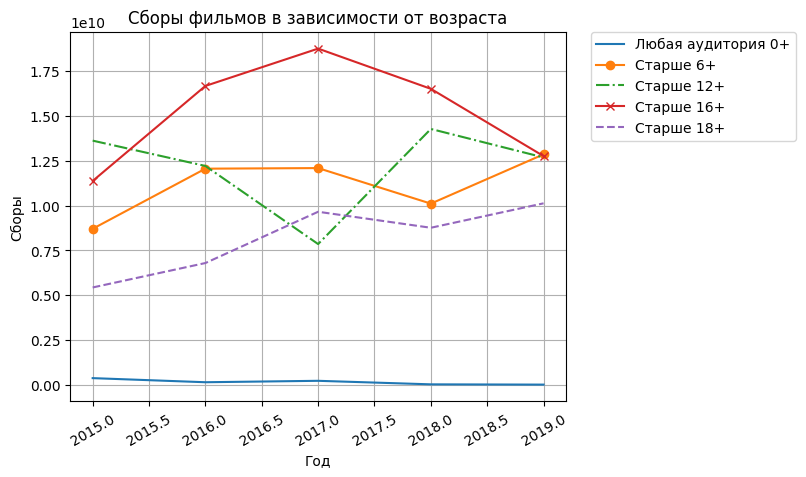

In [91]:
line_1, = plt.plot(year_0, label='Любая аудитория 0+')
line_2, = plt.plot(year_6, marker='o', label='Старше 6+')
line_3, = plt.plot(year_12, linestyle='-.', label='Старше 12+')
line_4, = plt.plot(year_16, marker='x', label='Старше 16+')
line_5, = plt.plot(year_18, linestyle='--', label='Старше 18+')
plt.grid()
plt.xticks(rotation=30)
plt.xlabel("Год")
plt.ylabel("Сборы")
plt.title("Сборы фильмов в зависимости от возраста")
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Вывод**

Результаты остались такие же. Получается что сборы фильмов в с ограничением по возрасту не зависят от года выхода в прокат. Фильмы, которые предназначены для детей страше 16 лет собирают больше денег, а фильмы с ограничением 0+ меньше всего. Это может зависить от разных причин:
- Возможно данных по фильмам с ограничением 0+ мало по сравнению с другими. 
- Фильмы с ограничением 0+ выходят реже, чем с другими ограничениями.
- На фильмы с ограничением 16+ ходят большая категория людей
- Хоть у фильмов с 0+ попадают во все возможные категории, на них ходят меньше людей, так как в основном они предназначены для детей.
- Фильмов 18+ также мало по сравнению с фильмами 16+ и 12+.

## Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Проведем исследование по фильмам, которые получили госудраственную поддержку и для этого сделаем следующий анализ:

- Cколько каждый год выделяют средства на поддержку кино
    - В какой год меньше всего выделили средств
    - В какой год больше всего выделили средств
    - Сколько было выделено минимально на один фильм
    - Сколько было выделено максимально на один фильм
- Сколько фильмов окупилось и их доля от общего количества
- Какой рейтинг у фильмов на которые выделяют средства
    - В какой год рейтиниги были лучше и хуже
    - Самый худший и лучший по рейтингам окупившийся фильм
    - Самый худший и лучший по рейтингам не окупившийся фильм
- На какие жанры выделяют средства
    - Фильмы какого жанра окупаются чаще
    - Фильмы какого жанра не окупаются
    - Фильмы какого жанра получают высокие рейтинги
    - А какого низкие
- Кто больше выделяет средств и какие фильмы окупаются в зависимости от того, кто финансировал
    - Кто чаще выделяет финансовую поддержку
    - У какого источника чаще окупаются фильмы
    - У какого финансирования лучшие рейтинги
    - Кто какие средства выделяет (возвратные и невозвартные)

### Cколько каждый год выделяют средств на поддержку кино

Для начала создадим датафрейм `supported_movies`, в котором будут только фильмы с государственной поддержкой.

In [92]:
supported_movies = movies_shows[movies_shows['budget'] > 0] # выделяем фильмы с государственной поддержкой

Также создадим столбец, в котором будет хранится сумма возвратных и невозвратных выделеных средств.

In [93]:
supported_movies['support'] = supported_movies['refundable_support'] + supported_movies['nonrefundable_support']

Создадим сводную таблицу, в которой будет находитс информация об общей сумме финансирование за каждый год, средняя и медианая сумма финансирования, минимальная и максимальная сумма финансирования в опеределенный год, а также количество финансируемых фильмов по году.

In [94]:
supported_movies.pivot_table(index='year_show_start',
                            values='support',
                            aggfunc=['sum','mean','median', 'min', 'max', 'count'],
                            margins=True)

,sum,mean,median,min,max,count
,support,support,support,support,support,support
year_show_start,,,,,,
2013,134347945.0,67173972.5,67173972.5,26500000.0,107847945.0,2
2014,572002299.0,35750143.7,27500000.0,20000000.0,90000000.0,16
2015,3656241459.0,42514435.6,30000000.0,4700000.0,250000000.0,86
2016,4303155482.0,70543532.5,35000000.0,6000000.0,450000000.0,61
2017,3183971662.0,77657845.4,40000000.0,6000000.0,400000000.0,41
2018,3446969465.0,61553026.2,45000000.0,15000000.0,260000000.0,56
2019,4904000000.0,70057142.9,40000000.0,3000000.0,500000000.0,70
All,20200688312.0,60845446.7,35000000.0,3000000.0,500000000.0,332


Также построим гистограмму по сумме финансирования в год и определим в какой год было сделано меньше всего финансирования, а в какой больше.

In [95]:
support_year = supported_movies.groupby('year_show_start')['support'].sum()

Text(0.5, 1.0, 'Финансирование фильмов по годам')

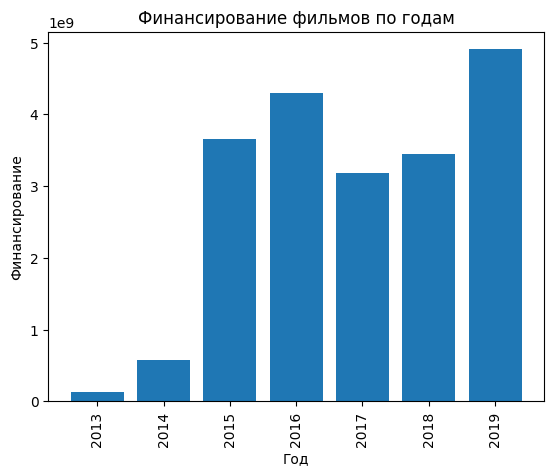

In [96]:
plt.bar(support_year.index, support_year)
plt.xticks(rotation=90);
plt.xlabel("Год")
plt.ylabel("Финансирование")
plt.title("Финансирование фильмов по годам")

**Вывод**

В результате можно сделать следующие выводы:
- Минимальная сумма финансирования была выплачена в 2013 году и составляет `134347945` рублей
- Максимальная сумма финансирования была выплачена в 2019 году и составляет `4904000000` рублей
- Минимальная сумма в 36 раз меньше максимальной суммы финансирования 
- Всего за 7 лет на фильмы было выделено `20200688312` рублей
- Всего было проспонсированого 332 фильма, меньше всего в 2013 году - 2 фильма и больше всего в 2015 - 86 фильмов
- В среднем на каждый фильм выделяют `35000000` рублей
- Меньше всего средств было выделено на один фильм в 2019 году `3000000` рублей
- Больше всего средств было выделено на один фильм также в 2019 году `500000000` рублей

### Окупаемость фильмов

Выясним сколько вообще фильмов, которые финансирует государство окупаются. Для это создадим новый столбец `payback` в котором будет храниться окупился фильм или нет.

In [97]:
supported_movies['payback'] = supported_movies['box_office'] - supported_movies['budget'] # вычтем сборы из бюджета фильма

In [98]:
supported_movies['payback'] = (
    supported_movies['payback']
    .where(supported_movies['payback'] > 0, False)
    .where(supported_movies['payback'] < 0, True)
) # если разница между бюджетом и сборами отрицательная то мы ставим False иначе True

Теперь сменим новому столбцу тип данных на `bool`

In [99]:
supported_movies['payback'] = supported_movies['payback'].astype('bool') # меняем тип данных

Создадим сводную таблицу в ней будет хранится информация о количестве финансируемых фильмов, количество окупившихся фильмов и разница между ними в процентах за каждый год

In [100]:
(
    supported_movies
    .pivot_table(index='year_show_start', 
                 values='payback', 
                 aggfunc=['count', 'sum', 'mean'], 
                 margins=True)
)

,count,sum,mean
,payback,payback,payback
year_show_start,,,
2013,2,0,0.0
2014,16,3,0.2
2015,86,19,0.2
2016,61,13,0.2
2017,41,17,0.4
2018,56,20,0.4
2019,70,21,0.3
All,332,93,0.3


**Вывод**

Можно сказать, что среди всех финансируемых фильмов 332 окупилось всего 93 фильма, что в процентном соотношение составляет `30%`, что крайне мало. Больше всего фильмов было про спонсировано в 2015 году `86`, больше всего фильмов окупилось в 2019 году `21`. В процентном соотношении худший год является 2013, там ни один фильм не окупился `0%`, лучший 2017 `40%`.

### Рейтинги фильмов

Необходимо выяснить какие рейтинги получают фильмы, которые финансируются государством.

In [101]:
# делаем сводную таблицу и считаем среднее, медиану, минимум и максимум, а также выводим итог
supported_movies.pivot_table(index='year_show_start',
                            values='ratings',
                            aggfunc=['mean','median', 'min', 'max'],
                            margins=True)

,mean,median,min,max
,ratings,ratings,ratings,ratings
year_show_start,,,,
2013,6.7,6.7,5.3,8.1
2014,6.0,6.4,3.8,6.9
2015,6.1,6.2,2.8,9.4
2016,5.7,5.8,1.0,8.5
2017,6.0,6.2,2.9,8.0
2018,6.0,6.2,2.5,7.7
2019,6.2,6.2,3.2,8.2
All,6.0,6.2,1.0,9.4


Также поэтим данным построим график

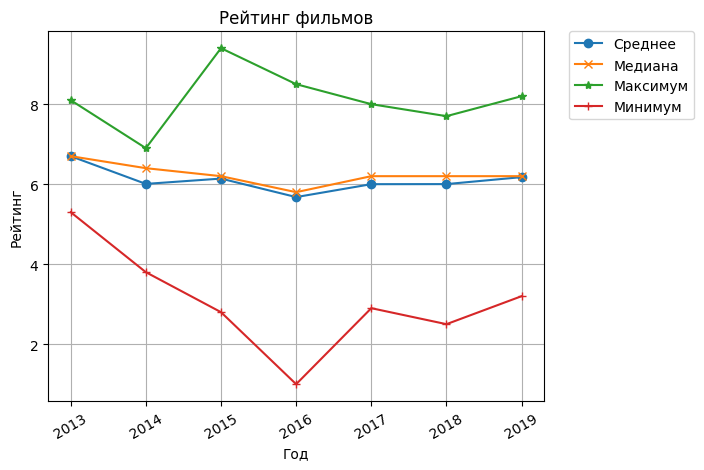

In [102]:
line_1, = (
    plt.plot(supported_movies
             .groupby('year_show_start')['ratings']
             .mean(), 
             marker='o', 
             label='Среднее')
)
line_2, = (
    plt.plot(supported_movies
             .groupby('year_show_start')['ratings']
             .median(), 
             marker='x', 
             label='Медиана')
)
line_3, = (
    plt.plot(supported_movies
             .groupby('year_show_start')['ratings']
             .max(),
             marker='*',
             label='Максимум')
)
line_4, = (
    plt.plot(supported_movies
             .groupby('year_show_start')['ratings']
             .min(), 
             marker='+', 
             label='Минимум')
)
plt.grid()
plt.xticks(rotation=30)
plt.xlabel("Год")
plt.ylabel("Рейтинг")
plt.title("Рейтинг фильмов")
plt.legend(handles=[line_1, line_2, line_3, line_4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Также посмотрим отдельно на фильмы, которые окупились и не окупились и выведим их средний, медианый, максимальный и минимальный рейтинг.

In [103]:
# делаем сводную таблицу окупившихся фильмов и считаем среднее, медиану, минимум и максимум, а также выводим итог
supported_movies[supported_movies['payback'] == True].pivot_table(index='year_show_start',
                            values='ratings',
                            aggfunc=['mean','median', 'min', 'max'],
                            margins=True)

,mean,median,min,max
,ratings,ratings,ratings,ratings
year_show_start,,,,
2014,5.8,6.0,5.0,6.5
2015,6.3,6.3,4.6,8.5
2016,5.9,5.8,4.3,7.6
2017,6.0,6.0,2.9,7.5
2018,5.8,6.1,3.9,6.9
2019,6.2,6.0,4.5,8.2
All,6.1,6.2,2.9,8.5


In [104]:
# делаем сводную таблицу не окупившихся фильмов и считаем среднее, медиану, минимум и максимум, а также выводим итог
supported_movies[supported_movies['payback'] == False].pivot_table(index='year_show_start',
                            values='ratings',
                            aggfunc=['mean','median', 'min', 'max'],
                            margins=True)

,mean,median,min,max
,ratings,ratings,ratings,ratings
year_show_start,,,,
2013,6.7,6.7,5.3,8.1
2014,6.1,6.4,3.8,6.9
2015,6.1,6.2,2.8,9.4
2016,5.6,5.9,1.0,8.5
2017,6.0,6.2,2.9,8.0
2018,6.1,6.2,2.5,7.7
2019,6.2,6.2,3.2,7.9
All,6.0,6.2,1.0,9.4


**Вывод**

Можно сделать следующие выводы:
- Среди всех финансируемых фильмов в среднем лучший рейтинг в 2013 году `6.7`, а худший в 2016 `5.8`
- Худший фильм был в 2016 году с рейтингом `1.0`
- Лучший фильм был в 2015 году с рейтингом `9.4`
- Минимальная разница между лучшим и худшим фильмом по рейтингам была в 2013 и 2014 годах
- Максимальная разница была в 2016 году
- В среднем фильмы, которые окупаются и не окупаются имеют одинаковый рейтинг `6.2`
- Самый худший по рейтингам фильм, который окупился был в 2017 году с рейтингом `2.9`
- Самый лучший был в 2015 году с рейтингом `8.5`
- Самый худший по рейтингам фильм, который не окупился был в 2016 году с рейтингом `1.0`
- Самый лучший был в 2015 году с рейтингм `9.4`

Окупаемость фильмов не зависит от рейтинга

### Жанр фильмов

Необходимо узнать:
- На какой жанр фильмов больше всего выделяют средств
- Какой жанр больше окупается (то есть пользуется спросом у зрителя)
- Какой в среднем рейтинг получает каждый жанр

Найдем на какой жанр больше всего выделяют средств

In [105]:
genre_support = (
    supported_movies
    .groupby('main_genre')['support']
    .sum()
    .sort_values()
) # группируем по основнму жанру и считаем сумму финансирования

In [106]:
genre_support # выводим все значения

main_genre
реальное ТВ     53000000.0
биография      112510000.0
детский        119000000.0
мюзикл         240453119.0
криминал       280000000.0
боевик         334000000.0
семейный       339000000.0
ужасы          355000000.0
мелодрама      398000000.0
военный        422000866.0
спорт          455000000.0
детектив       485000000.0
unknown        688969465.0
приключения    696000000.0
триллер        769645285.0
история       1020000000.0
фэнтези       1032900000.0
фантастика    1406000000.0
мультфильм    2461520000.0
комедия       3218282945.0
драма         5314406632.0
Name: support, dtype: float64

Выведим на что меньше и больше всего выделяют

In [107]:
genre_support.min(), genre_support.max() # получим минимальное и максимальное значение

(53000000.0, 5314406632.0)

Минимальное значение соотвествует жанру - `Реальное ТВ`

Максимальное значение соотвествует жанру - `Драма`

Также построим гистограмму

Text(0.5, 1.0, 'Финансирование фильмов по жанрам')

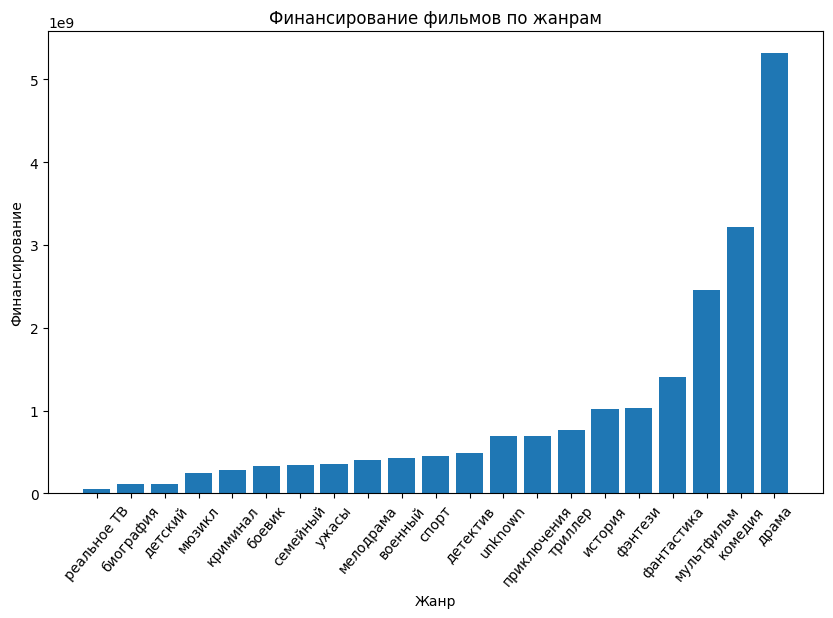

In [108]:
plt.figure(figsize = (10, 6))
plt.bar(genre_support.index, genre_support)
plt.xticks(rotation=50);
plt.xlabel("Жанр")
plt.ylabel("Финансирование")
plt.title("Финансирование фильмов по жанрам")

Теперь посмотрим какой жанр чаще окупается. Для этого построим график.

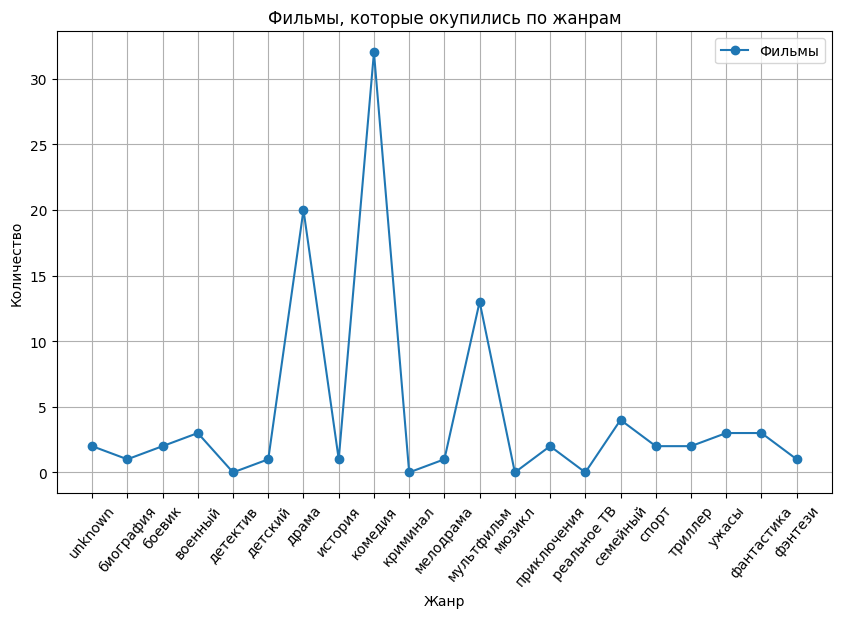

In [109]:
plt.figure(figsize = (10, 6))
line_1, = (
    plt.plot(supported_movies
             .groupby('main_genre')['payback']
             .sum(), 
             marker='o', 
             label='Фильмы')
)
plt.grid()
plt.xticks(rotation=50)
plt.xlabel("Жанр")
plt.ylabel("Количество")
plt.title("Фильмы, которые окупились по жанрам")
plt.legend(handles=[line_1])
plt.show()

Построим такой же график, чтобы выяснить средний рейтинг каждого жанра

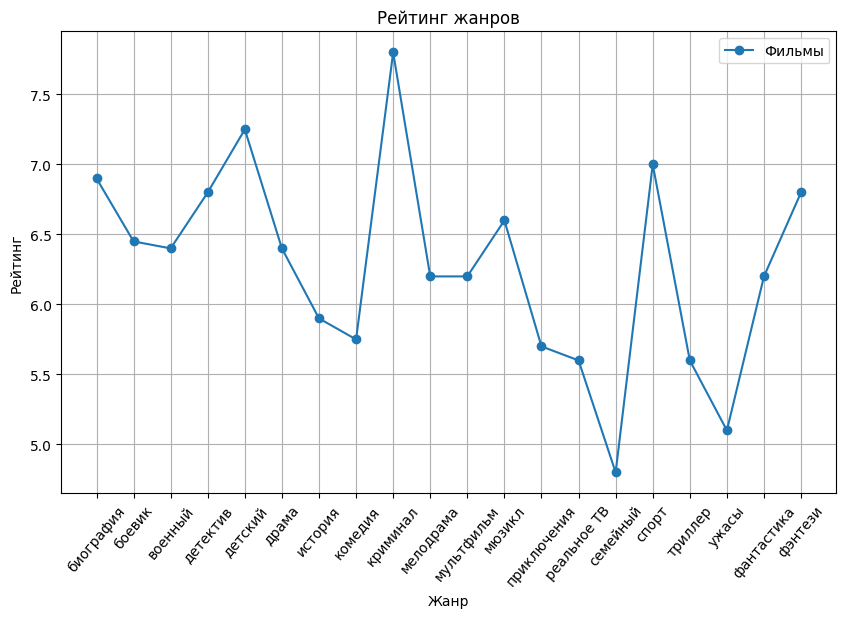

In [110]:
plt.figure(figsize = (10, 6))
line_1, = (
    plt.plot(supported_movies
             .groupby('main_genre')['ratings']
             .median(), 
             marker='o', 
             label='Фильмы')
)
plt.grid()
plt.xticks(rotation=50)
plt.xlabel("Жанр")
plt.ylabel("Рейтинг")
plt.title("Рейтинг жанров")
plt.legend(handles=[line_1])
plt.show()

**Вывод**

В результате данного исследования можно сделать следующие выводы:
- Меньше всего выделяют денег на жанр `Реальное ТВ` - 53000000
- Больше всего выделяют денег на жанр `Драма` - 5314406632

Это также может говорить о том, что чаще у нас снимают драмы.
- Чаще всего окупаются фильмы жанра `Комедия` - 32 фильма
- Также хорошо окупаются фильмы жанров `Драма` - 20 фильмов, и на третьем месте `Мультфильмы` - 12 фильмов
- Хуже всего окупаются фильмы с жанрами `Криминал`, `Детектив`, `Мюзикл` и `Приключение` - 0 фильмов
- Лучшие рейтинги в среднем у фильмов с жанрами `Криминал` - 7.7, `Детский` - 7.2 и `Спорт` - 7.0
- Худшие рейтинги в среднем у фильмов с жанрами `Семейный` - 4.5, `Ужасы` - 5.2 и `Триллер` - 5.6

Также в очередной раз подтверждается, что окупаемость фильмов не зависит от рейтига. Фильмы жанра `Криминал` имеют самый высокий рейтинг, но при этом ни разу не окупились, жанр `Детектив` входит в топ-5 по рейтингам и также не окупился ни разу.

Фильмы жанра `Комедия` имеют в среднем рейтинг - 5.7, а жанра `Драма` - 6.4, что говорит о том, что окупаемость фильмов скорее всего зависит от жанра.

### Источник государственного финансирования

Необходимо выяснить кто больше профинансировал фильмы, то есть `Министерство культуры` или `Фонд кино` или же они совместно. Также узнать у кого фильмы окупаются чаще, какой в среднем рейтинг и кто сколько выделил в возвратных и невозвратных средсв, а также общую сумму средств.


In [111]:
# группируем по источнику финансирования и находим всего фильмов, количество окупившихся фильмов и их долю
supported_movies.groupby('financing_source')['payback'].agg(['count','sum','mean'])

,count,sum,mean
financing_source,,,
Министерство культуры,164,29,0.2
"Министерство культуры, Фонд кино",22,1,0.0
Фонд кино,146,63,0.4


In [112]:
supported_movies.groupby('financing_source')['support'].sum() # выясням сумму финансирования по источнику

financing_source
Министерство культуры               4836661000.0
Министерство культуры, Фонд кино    1185431354.0
Фонд кино                          14178595958.0
Name: support, dtype: float64

In [113]:
supported_movies.groupby('financing_source')['ratings'].median() # выводим средний рейтинг фильма по источнику финансирования

financing_source
Министерство культуры              6.2
Министерство культуры, Фонд кино   6.6
Фонд кино                          6.0
Name: ratings, dtype: float64

In [114]:
(
    supported_movies
    .pivot_table(index='financing_source', 
                 values=['refundable_support', 'nonrefundable_support'], 
                 aggfunc='sum')
)

,nonrefundable_support,refundable_support
financing_source,,
Министерство культуры,4836661000.0,0.0
"Министерство культуры, Фонд кино",859931354.0,325500000.0
Фонд кино,10565095958.0,3613500000.0


**Вывод**

- Чаще всего финансовая поддержка идет от Министерства культуры - 164 фильма, следом Фонд кино - 146 фильмов
- Чаще всего окупаются фильмы у Фонда кино `40%` - 63 фильма
- Хуже всего окупаются фильмы при совместном финансировании `1` фильм
- Больше всего выделили средств Фонд кино - `14178595958`, а меньше всего их совместное финансирование `1185431354`
- Лучшие рейтинги имеют фильмы, которые финансировались совместно - `6.6`, худший у Фонда кино - `6.0`
- Министерство культуры вообше не выделяет возвратные средства, только при совместном финансировании, но установить выделили те деньги они или Фонд кино не выйдет

## Шаг 5. Общий вывод

Данные были получены из двух файлов:
- `/datasets/mkrf_movies.csv`;
- `/datasets/mkrf_shows.csv`.

Оба датасета объединили в один под названием `movies_shows`.

Сначала был сделан обзор данных. Само исследование проходило в четыре этапа:

- Изучить данные;
- Предобработка данных;
- Исследовательский анализ данных;
- Исследовать фильмы, которые получили гостударсвтенную поддержку;

**1. Обзор данных**

В результате соединеня датасетов получили в таблице 16 столбцов, тип данных - `float`(4), `object`(11) и `string`(1). Название столбцов соотвествует стилю, кроме столбца `puNumber`. Количестов значений в столбцах разное, а значит в них есть пропущенные значения.

**2. Предобработка данных**

- Переименовали столбец `puNumber`в `pu_number`.

Проверили типы данных в датафрейме и поменяли их, где было необходимо:

- Изменили тип данных в столбце `show_start_date` с `object` на `datetime`;
- Изменили тип данных в столбце `ratings` с `object` на `float`. Для этого в начале убарли из значений `%`, а затем перевели значения в систему оценок от 1 до 10.

Изучили пропуски в датафрейме:

- Пропуски есть во всех столбца, кроме столбцов `pu_number`, `title`, `show_start_date`, `type` и `age_restriction`.
- В столбцах `production_country`, `director` и `film_studio`избались от пропусков удалив их, так как их сумма всех пропусков здесь равна 29;
- В столбцах `genres`, `financing_source` и `producer` заполнили пропуски строкой `unknown`, так как эти значения еще пригодятся для исследования;
- В остальных столбцах пропуски заполнить не получилось.

Изучили дубликаты в датафрейме:

- Сделали проверку на явные дубликаты и они не были обнаружены;
- По работали с неявными дубликатами и заменили в названиях фильмах букву ё на е;
- В столбце `pu_number` нашли дубликаты и удалили их, так как их было всего 2.

Изучили категориальные значения:

- В столбце `type` удалили пробелы в начале строки;
- В столбце `film_studio` удалили пробелы в конце строки.

Изучили количественные значения:

- Привели значения в столбце `box_office` к более читаемому виду;
- Заполнили столбец `budget` с нулевым значениями, суммой двух столбцов `refundable_support` и `nonrefundable_support`.

Добавили новые столбцы:

- Добавили столбец `year_show_start`, в котором храниться год премьеры фильма;
- Добавили столбец `main_genre`, в котором хранится основной жанр фильма;
- Добавили столбец `main_director`, в котором хранится основной режиссер фильма;
- Добавилм столбец `share_total_budget`, в котором храниться информация о том, какую долю от общего бюджета занимается государственное финансирование в процентах.

**3. Исследовательский анализ данных**

1. Изучили фильмы, выходившие в прокат каждый год.

    Фильмов, у которых известны сборы меньше. Информация о сборах каждый год увеличивалась. В `2015` году произошло резкое увелечение, возможно с этого года стали чаще делиться информацией о сборах или же стало выходить больше Российский фильмов, которые также финансировались государством и из-за этого стали чаще расскрывать сборы.
    Лучше всего представлен в данных `2017` год и доля фильмов с известными сборами составляет `70%`. Это также может быть связано с тем, что в `2017` году вышло меньше фильмов, чем за другие года (`505`). Если же говорить о периоде то начиная с `2015` года и заканчивая последним годом в данных (`2019`), то они были представлены лучше всего и самым худшим значением является `54%` в `2018` году.

2. Динамика проката.

    Динамика проката с каждым годом практически увеличивалась. В `2019` году был небольшой спад, но так как данные на этом заканичиваются сделать вывод более точный не получиться.
    Самым худшим годом был `2010`, причин может быть несколько, например, этот год плохо представлен в данных, а также может люди в принципе в то время меньше ходили в кинотеары.
    Самым лучшим годом в данных является `2018` год. На этот ответ могло повлиять то, что период с `2015` по `2019` год лучше всего представленны в данных.

3. Средняя и медианная сумма сборов.

    Медианная сумма сборов держится примерно на одном уровне каждый год, в отличии от средней суммы, медианное значение также меньше среднего. Наибольшее средние значение было получено в `2017` году и составляет оно `136032793.3` С `2010` по `2013` год среднее значение находилось в целом на одном уровне, а с `2014` года среднее значение стало резко увеличиваться, скорее всего связано с большой разницей сборов между фильмами.

4. Влияет ли возрастное ограничение аудитории на сборы фильма?

    Сборы фильмов в с ограничением по возрасту не зависят от года выхода в прокат. Фильмы, которые предназначены для детей страше `16+` лет собирают больше денег, а фильмы с ограничением `0+` меньше всего. Это может зависить от разных причин:
    
    - Возможно данных по фильмам с ограничением `0+` мало по сравнению с другими;
    - Фильмы с ограничением `0+` выходят реже, чем с другими ограничениями;
    - На фильмы с ограничением `16+` ходят большая категория людей;
    - Хоть у фильмов с `0+` попадают во все возможные категории, на них ходят меньше людей, так как в основном они предназначены для детей;
    - Фильмов `18+` также мало по сравнению с фильмами `16+` и `12+`.

**4. Исследуем фильмы, которые получили государственную поддержку**

1. Cколько каждый год выделяют средств на поддержку кино.

    В результате можно сделать следующие выводы:

    - Минимальная сумма финансирования была выплачена в `2013` году и составляет `134347945` рублей;
    - Максимальная сумма финансирования была выплачена в `2019` году и составляет `4904000000` рублей;
    - Минимальная сумма в `36` раз меньше максимальной суммы финансирования;
    - Всего за `7` лет на фильмы было выделено `20200688312` рублей;
    - Всего было проспонсированого `332` фильма, меньше всего в `2013` году - `2` фильма и больше всего в `2015` - `86` фильмов;
    - В среднем на каждый фильм выделяют `35000000` рублей;
    - Меньше всего средств было выделено на один фильм в `2019` году `3000000` рублей;
    - Больше всего средств было выделено на один фильм также в `2019` году `500000000` рублей.

2. Окупаемость фильмов.

    Среди всех финансируемых фильмов `332`, окупилось всего `93` фильма, что в процентном соотношение составляет `30%`, что крайне мало. Больше всего фильмов было проспонсировано в `2015` году `86` фильмов, больше всего фильмов окупилось в `2019` году - `21`. В процентном соотношении худший годом является `2013`, там ни один фильм не окупился `0%`, лучший `2017` - `40%`.
    
3. Рейтинги фильмов.

    Можно сделать следующие выводы:
    - Среди всех финансируемых фильмов в среднем лучший рейтинг в 2013 году `6.7`, а худший в 2016 `5.8`;
    - Худший фильм был в 2016 году с рейтингом `1.0`;
    - Лучший фильм был в 2015 году с рейтингом `9.4`;
    - Минимальная разница между лучшим и худшим фильмом по рейтингам была в 2013 и 2014 годах;
    - Максимальная разница была в 2016 году;
    - В среднем фильмы, которые окупаются и не окупаются имеют одинаковый рейтинг `6.2`;
    - Самый худший по рейтингам фильм, который окупился был в 2017 году с рейтингом `2.9`;
    - Самый лучший был в 2015 году с рейтингом `8.5`;
    - Самый худший по рейтингам фильм, который не окупился был в 2016 году с рейтингом `1.0`;
    - Самый лучший был в 2015 году с рейтингм `9.4`.

    Окупаемость фильмов не зависит от рейтинга.

4. Жанр фильмов.

    В результате данного исследования можно сделать следующие выводы:
    
    - Меньше всего выделяют денег на жанр `Реальное ТВ` - 53000000;
    - Больше всего выделяют денег на жанр `Драма` - 5314406632.

    Это также может говорить о том, что чаще у нас снимают драмы.
    
    - Чаще всего окупаются фильмы жанра `Комедия` - 32 фильма;
    - Также хорошо окупаются фильмы жанров `Драма` - 20 фильмов, и на третьем месте `Мультфильмы` - 12 фильмов;
    - Хуже всего окупаются фильмы с жанрами `Криминал`, `Детектив`, `Мюзикл` и `Приключение` - 0 фильмов;
    - Лучшие рейтинги в среднем у фильмов с жанрами `Криминал` - 7.7, `Детский` - 7.2 и `Спорт` - 7.0;
    - Худшие рейтинги в среднем у фильмов с жанрами `Семейный` - 4.5, `Ужасы` - 5.2 и `Триллер` - 5.6;

    Также в очередной раз подтверждается, что окупаемость фильмов не зависит от рейтига. Фильмы жанра `Криминал` имеют самый высокий рейтинг, но при этом ни разу не окупились, жанр `Детектив` входит в топ-5 по рейтингам и также не окупился ни разу.

    Фильмы жанра `Комедия` имеют в среднем рейтинг - 5.7, а жанра `Драма` - 6.4, что говорит о том, что окупаемость фильмов скорее всего зависит от жанра.

5. Источники государственного финансирования.

- Чаще всего финансовая поддержка идет от Министерства культуры - 164 фильма, следом Фонд кино - 146 фильмов;
- Чаще всего окупаются фильмы у Фонда кино `40%` - 63 фильма;
- Хуже всего окупаются фильмы при совместном финансировании `1` фильм;
- Больше всего выделили средств Фонд кино - `14178595958`, а меньше всего их совместное финансирование `1185431354`;
- Лучшие рейтинги имеют фильмы, которые финансировались совместно - `6.6`, худший у Фонда кино - `6.0`;
- Министерство культуры вообше не выделяет возвратные средства, только при совместном финансировании, но установить выделили те деньги они или Фонд кино не выйдет.

**Вывод**

Зрителю интересны комедии и драмы в независимости от их рейтинга, желательно, чтобы это был фильм 16+ или 6+, они больше зарабатывают денег. Фильмы на которые выделяет средства государство окупаются меньше половины, а следовательно зрителю не интеренсы данные фильмы, возможно, это связано с тем, что в производстве участвует государство, а также не очень хорошей репутации у Фонда кино.